In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

In [2]:
data_nn = pd.read_csv("/Users/achiakairabor/Downloads/chart-data.csv")

In [3]:
data_nn.head()

,year,Total greenhouse gases
0,1990,806
1,1991,815
2,1992,793
3,1993,773
4,1994,762


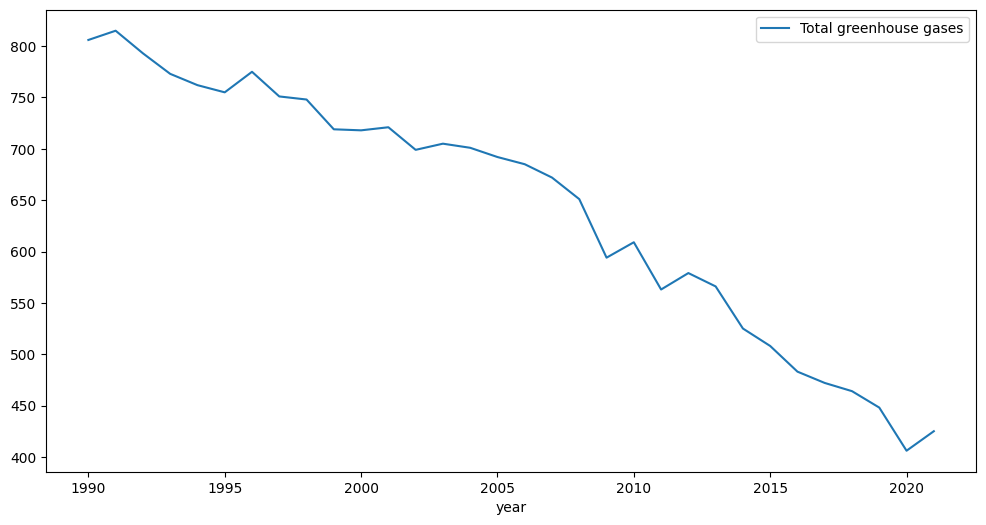

In [4]:
ax = data_nn.plot(x='year', y='Total greenhouse gases', figsize=(12,6))

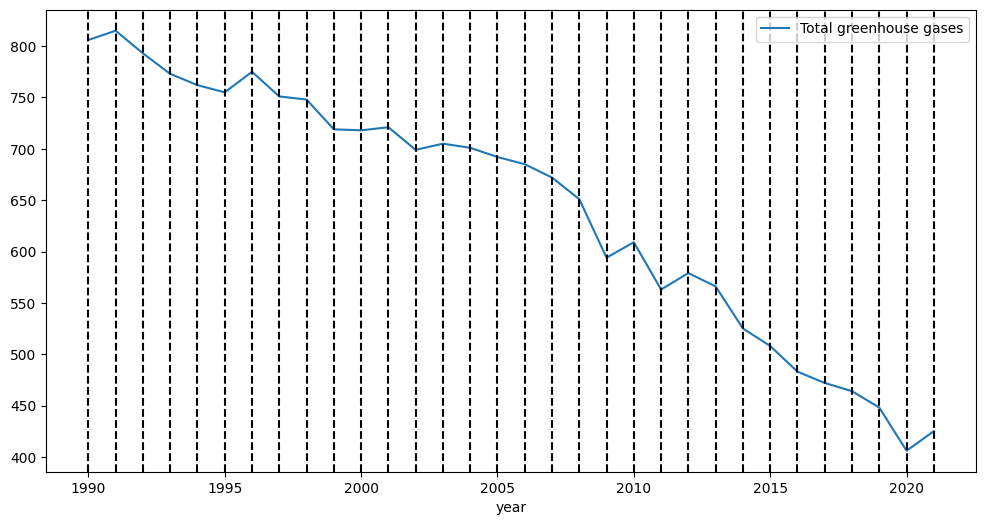

In [5]:
ax = data_nn.plot(x='year', y='Total greenhouse gases', figsize=(12,6))
xcoords = data_nn['year']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
data_nn['year'] = pd.to_datetime(data_nn['year'], format='%Y')

In [7]:
data_nn.head()

,year,Total greenhouse gases
0,1990-01-01,806
1,1991-01-01,815
2,1992-01-01,793
3,1993-01-01,773
4,1994-01-01,762


In [8]:
data_nn.set_index('year')

,Total greenhouse gases
year,
1990-01-01,806
1991-01-01,815
1992-01-01,793
1993-01-01,773
1994-01-01,762
1995-01-01,755
1996-01-01,775
1997-01-01,751
1998-01-01,748


In [9]:
#convert to time series:
ts = data_nn['Total greenhouse gases']
ts.head(10)

0    806
1    815
2    793
3    773
4    762
5    755
6    775
7    751
8    748
9    719
Name: Total greenhouse gases, dtype: int64

In [10]:
# Take the first difference of the data to remove the trend
ts = ts.diff()

In [11]:
# Drop the first NaN value coming from taking the difference 
ts = ts.dropna()

In [12]:
ts.head()

1     9.0
2   -22.0
3   -20.0
4   -11.0
5    -7.0
Name: Total greenhouse gases, dtype: float64

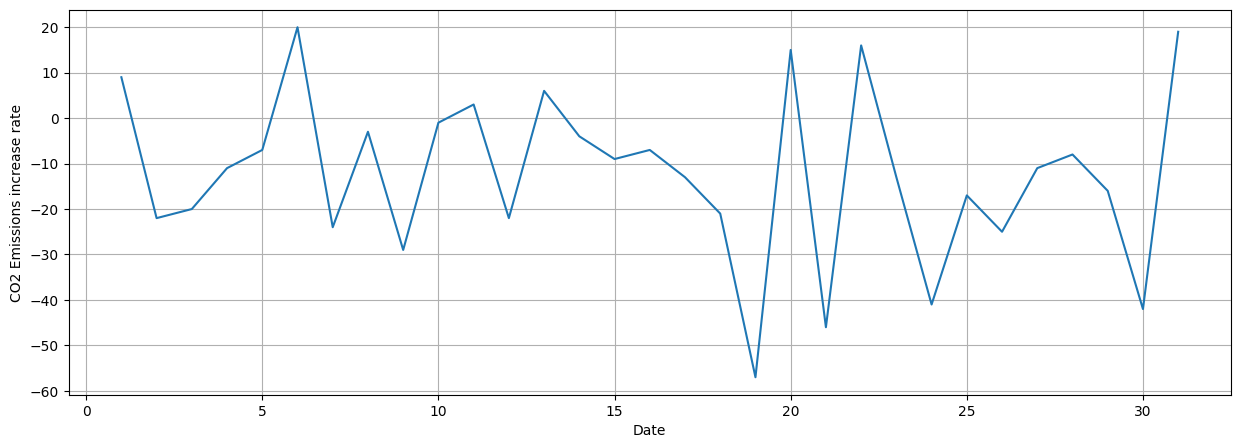

In [13]:
# Plot the data to see the outcome
ts.plot(figsize=(15,5))
plt.xlabel('Date')
plt.ylabel('CO2 Emissions increase rate')
plt.grid()
plt.show()

In [14]:
# Drop the first NaN value coming from taking the difference 
data_nn = data_nn.dropna()

In [15]:
#Dicky-Fuller test of stationarity function
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

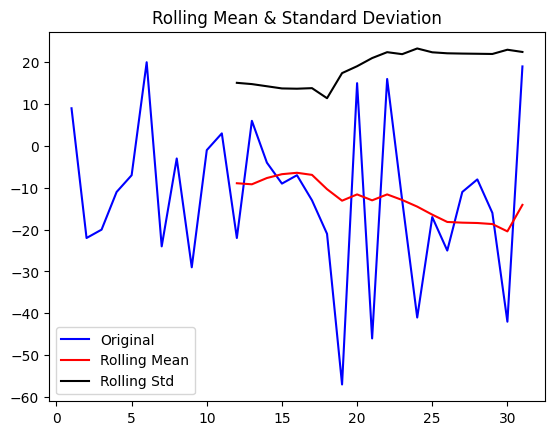

Results of Dickey-Fuller Test:
Test Statistic                -8.052435e+00
p-value                        1.727618e-12
#Lags Used                     0.000000e+00
Number of Observations Used    3.000000e+01
Critical Value (1%)           -3.669920e+00
Critical Value (5%)           -2.964071e+00
Critical Value (10%)          -2.621171e+00
dtype: float64


In [16]:
test_stationarity(ts)

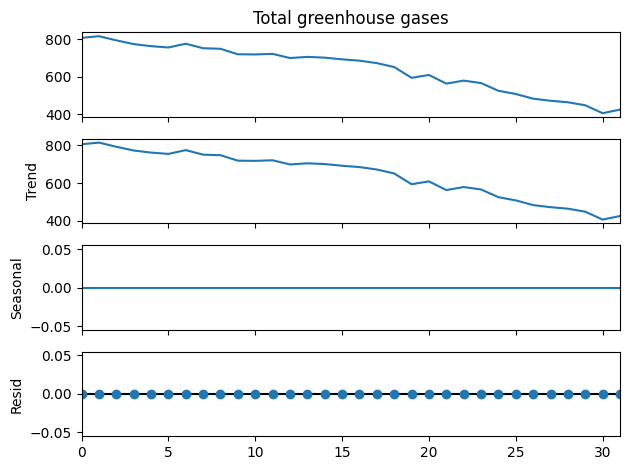

In [17]:

data_nn.sort_index(inplace=True)
tss = data_nn['Total greenhouse gases']
decompose_result_mult = seasonal_decompose(tss, model="additive", period=1)

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

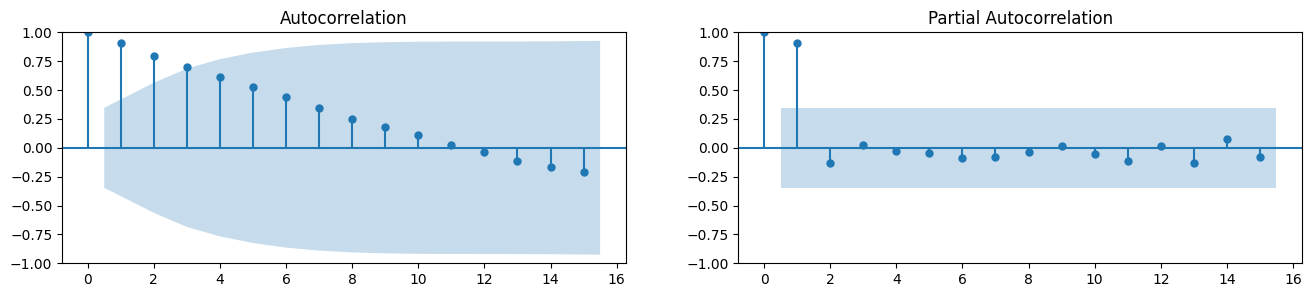

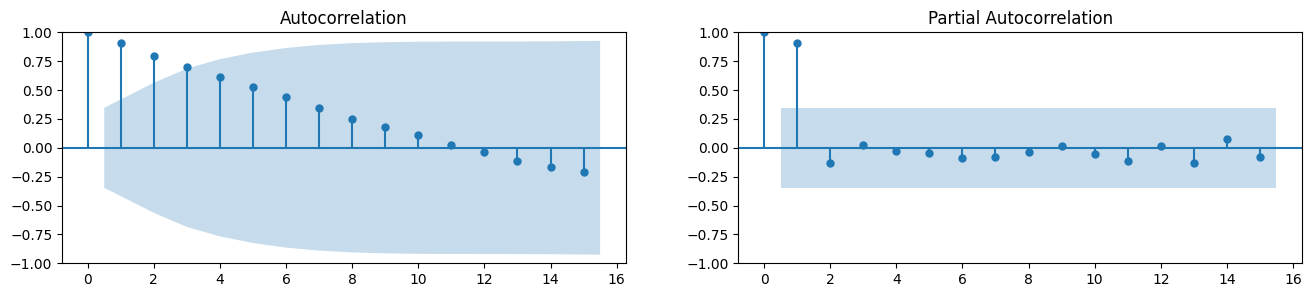

In [18]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(data_nn['Total greenhouse gases'].tolist(), lags=15, ax=axes[0])
plot_pacf(data_nn['Total greenhouse gases'].tolist(), lags=15, ax=axes[1])

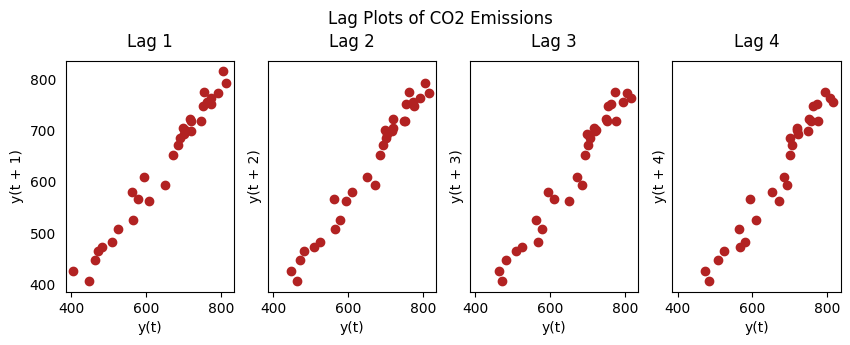

In [19]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(data_nn['Total greenhouse gases'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of CO2 Emissions', y=1.05)    
plt.show()

In [20]:
import itertools
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets
print('Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[1]))
print('SARIMAX: {} x {}'.format(pdq[2], pdq_x_QDQs[2]))

Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)


In [21]:
print(pdq)
print(pdq_x_QDQs)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]


In [22]:
import statsmodels.api as sm
for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts,
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.39133D+00    |proj g|=  1.21074D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   1.306D-06   4.391D+00
  F =   4.3911431272831196     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.7

 This problem is unconstrained.
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored wh

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.77731D-01    |proj g|=  1.11214D-01

At iterate    5    f=  9.33913D-01    |proj g|=  8.58333D-05

At iterate   10    f=  9.33912D-01    |proj g|=  1.39003D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     11     14      1     0     0   9.749D-08   9.339D-01
  F =  0.93391151174294029     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/l

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.25771D+00    |proj g|=  2.13020D-01

At iterate    5    f=  4.24497D+00    |proj g|=  5.22510D-03

At iterate   10    f=  4.24481D+00    |proj g|=  5.08206D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     11     14      1     0     0   4.272D-06   4.245D+00
  F =   4.2448127937680953     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._ini


At iterate    5    f=  2.79307D+00    |proj g|=  3.09957D-04

At iterate   10    f=  2.79305D+00    |proj g|=  1.32886D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     15      1     0     0   2.936D-06   2.793D+00
  F =   2.7930482788155833     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.59999D+00    |proj g|=  2.40829D-01

At iterate    5    f=  2.51756D+00    |proj g|=  2.83368D-03

At iter

/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._ini


At iterate   10    f=  7.53094D-01    |proj g|=  3.57315D-03

At iterate   15    f=  7.52820D-01    |proj g|=  1.42837D-03

At iterate   20    f=  7.52760D-01    |proj g|=  6.07065D-04

At iterate   25    f=  7.52726D-01    |proj g|=  3.59941D-04

At iterate   30    f=  7.52717D-01    |proj g|=  2.50754D-05

At iterate   35    f=  7.52717D-01    |proj g|=  8.26896D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     44      1     0     0   8.269D-06   7.527D-01
  F =  0.75271696206677152     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/stats

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.73870D+00    |proj g|=  1.76699D-02

At iterate    5    f=  2.68304D+00    |proj g|=  3.98858D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      6      7      1     0     0   1.051D-06   2.683D+00
  F =   2.6830366174209592     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v

/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored wh

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.05365D+00    |proj g|=  3.42020D-01

At iterate    5    f=  4.03166D+00    |proj g|=  2.26256D-02

At iterate   10    f=  3.99206D+00    |proj g|=  1.90074D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     13     17      1     0     0   5.509D-07   3.992D+00
  F =   3.9919645043298591     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/l


At iterate   15    f=  6.58640D-01    |proj g|=  7.93082D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     19      1     0     0   7.931D-06   6.586D-01
  F =  0.65864038992353569     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.69631D+00    |proj g|=  1.41073D-01

At iterate    5    f=  2.63182D+00    |proj g|=  2.41241D-02

At iterate   10    f=  2.63130D+00    |proj g|=  1.13633D-01

At iter

/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/stats


At iterate    5    f=  9.77146D-01    |proj g|=  3.90812D-02

At iterate   10    f=  9.73335D-01    |proj g|=  2.17292D-04

At iterate   15    f=  9.73210D-01    |proj g|=  1.86956D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     29      1     0     0   4.266D-06   9.732D-01
  F =  0.97319964590519981     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.92210D-01    |proj g|=  4.38996D-02

At iter

/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/stats


At iterate   15    f=  2.64747D+00    |proj g|=  1.16335D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     18      1     0     0   1.048D-05   2.647D+00
  F =   2.6474665393709818     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.38648D-01    |proj g|=  1.00592D-01

At iterate    5    f=  9.01574D-01    |proj g|=  1.84841D-04

At iterate   10    f=  9.01553D-01    |proj g|=  1.09190D-03

       

/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/stats

At iterate    5    f=  4.15966D+00    |proj g|=  1.80571D-01

At iterate   10    f=  4.14353D+00    |proj g|=  2.63540D-02

At iterate   15    f=  4.14258D+00    |proj g|=  1.56207D-01

At iterate   20    f=  4.12918D+00    |proj g|=  1.67185D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     36      1     0     0   9.945D-06   4.127D+00
  F =   4.1273254291923154     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At itera

/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._ini


At iterate   10    f=  2.56966D+00    |proj g|=  1.73999D-03

At iterate   15    f=  2.56861D+00    |proj g|=  1.68440D-03

At iterate   20    f=  2.56855D+00    |proj g|=  6.12443D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     32      1     0     0   7.287D-06   2.569D+00
  F =   2.5685479956898756     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.25016D-01    |proj g|=  8.34546D-02

At iter

/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/stats


At iterate   25    f=  2.46134D+00    |proj g|=  1.11905D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     31      1     0     0   1.841D-05   2.461D+00
  F =   2.4613379038957555     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.56496D-01    |proj g|=  4.05740D-02

At iterate    5    f=  9.32472D-01    |proj g|=  5.54252D-02

At iterate   10    f=  8.97473D-01    |proj g|=  1.42273D-03

At iter

/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/stats

  ys=-2.417E-02  -gs= 1.462E-02 BFGS update SKIPPED

At iterate   20    f=  6.88235D-01    |proj g|=  1.87389D-01

At iterate   25    f=  6.63336D-01    |proj g|=  1.77206D+00

At iterate   30    f=  6.60123D-01    |proj g|=  1.79624D-01

At iterate   35    f=  6.60059D-01    |proj g|=  1.41903D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     73      1     1     0   3.216D-04   6.601D-01
  F =  0.66005806632115893     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0   

/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/stats


At iterate    5    f=  7.97634D-01    |proj g|=  7.94785D-03

At iterate   10    f=  7.95169D-01    |proj g|=  2.15826D-03

At iterate   15    f=  7.93312D-01    |proj g|=  4.44863D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     22      1     0     0   5.688D-06   7.933D-01
  F =  0.79330994836832247     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.60073D+00    |proj g|=  2.13858D-01

At iter

/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/stats


At iterate    5    f=  2.51007D+00    |proj g|=  1.92270D-03

At iterate   10    f=  2.50797D+00    |proj g|=  1.37783D-02

At iterate   15    f=  2.50643D+00    |proj g|=  3.13140D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     19      1     0     0   2.335D-05   2.506D+00
  F =   2.5064306647581307     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.78506D-01    |proj g|=  6.94044D-02

At iter

 This problem is unconstrained.
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.50322D-01    |proj g|=  4.66641D-02

At iterate    5    f=  7.93250D-01    |proj g|=  7.46729D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     10      1     0     0   7.280D-06   7.932D-01
  F =  0.79323944157840320     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/stats


At iterate    5    f=  2.28447D+00    |proj g|=  4.84946D-03

At iterate   10    f=  2.27670D+00    |proj g|=  3.62180D-02

At iterate   15    f=  2.27471D+00    |proj g|=  1.33047D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     22      1     0     0   7.417D-06   2.275D+00
  F =   2.2747048667212479     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.48091D+00    |proj g|=  3.03133D-02

At iter

/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._ini


At iterate    5    f=  6.05853D-01    |proj g|=  5.25040D-03

At iterate   10    f=  6.04717D-01    |proj g|=  1.72387D-03

At iterate   15    f=  6.03519D-01    |proj g|=  3.07908D-02

At iterate   20    f=  5.96379D-01    |proj g|=  2.07418D-03

At iterate   25    f=  5.96360D-01    |proj g|=  4.91706D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     28      1     0     0   4.917D-06   5.964D-01
  F =  0.59635972244112767     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._ini

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.81568D-01    |proj g|=  1.04192D-01

At iterate    5    f=  7.79127D-01    |proj g|=  2.75960D-03

At iterate   10    f=  7.77946D-01    |proj g|=  6.39233D-03

At iterate   15    f=  7.72420D-01    |proj g|=  7.97233D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     28      1     0     0   2.714D-06   7.724D-01
  F =  0.77241749449119768     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achiakairabor/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.88189D-01    |proj g|=  3.94020D-02

At iterate    5    f=  6.18498D-01    |proj g|=  6.73150D-03

At iterate   10    f=  6.18220D-01    |proj g|=  2.92616D-03

At iterate   15    f=  6.14085D-01    |proj g|=  4.43600D-03

At iterate   20    f=  6.13859D-01    |proj g|=  1.77096D-04

At iterate   25    f=  6.13836D-01    |proj g|=  2.44390D-04

At iterate   30    f=  6.13835D-01    |proj g|=  1.94259D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

In [23]:
a=[]
b=[]
c=[]
wf=pd.DataFrame()

In [24]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [25]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            a.append(param)
            b.append(param_seasonal)
            c.append(results.aic)
        except:
            continue
wf['pdq']=a
wf['pdq_x_QDQs']=b
wf['aic']=c
print(wf[wf['aic']==wf['aic'].min()])

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.39133D+00    |proj g|=  1.21074D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   1.306D-06   4.391D+00
  F =   4.3911431272831196     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:274.2508738915534
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variable

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.25771D+00    |proj g|=  2.13020D-01

At iterate    5    f=  4.24497D+00    |proj g|=  5.22510D-03

At iterate   10    f=  4.24481D+00    |proj g|=  5.08206D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     11     14      1     0     0   4.272D-06   4.245D+00
  F =   4.2448127937680953     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:267.1783932136219
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisi

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.79307D+00    |proj g|=  3.09957D-04

At iterate   10    f=  2.79305D+00    |proj g|=  1.32886D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     15      1     0     0   2.936D-06   2.793D+00
  F =   2.7930482788155833     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:179.16899328656615
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.59999D+00    |proj g|=  2.40829D-01

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.53094D-01    |proj g|=  3.57315D-03

At iterate   15    f=  7.52820D-01    |proj g|=  1.42837D-03

At iterate   20    f=  7.52760D-01    |proj g|=  6.07065D-04

At iterate   25    f=  7.52726D-01    |proj g|=  3.59941D-04

At iterate   30    f=  7.52717D-01    |proj g|=  2.50754D-05

At iterate   35    f=  7.52717D-01    |proj g|=  8.26896D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     44      1     0     0   8.269D-06   7.527D-01
  F =  0.75271696206677152     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:54.66845164813

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:171.24136025305233
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.73870D+00    |proj g|=  1.76699D-02

At iterate    5    f=  2.68304D+00    |proj g|=  3.98858D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      6      7      1     0     0   1.051D-06   2.683D+00
  F =   2.6830366174209592     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:168.34827028009948
RUNNING THE L-BFGS-B

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.03166D+00    |proj g|=  2.26256D-02

At iterate   10    f=  3.99206D+00    |proj g|=  1.90074D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     13     17      1     0     0   5.509D-07   3.992D+00
  F =   3.9919645043298591     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:251.50179926845126
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.36937D+00    |proj g|=  1.33418D-01

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  9.73335D-01    |proj g|=  2.17292D-04

At iterate   15    f=  9.73210D-01    |proj g|=  1.86956D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     29      1     0     0   4.266D-06   9.732D-01
  F =  0.97319964590519981     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:66.33837804612239
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.92210D-01    |proj g|=  4.38996D-02

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  9.01728D-01    |proj g|=  2.17345D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     18      1     0     0   8.340D-07   9.017D-01
  F =  0.90172804936138085     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:61.90713906040561
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.66350D+00    |proj g|=  2.15537D-02

At iterate    5    f=  2.66258D+00    |proj g|=  1.08956D-02

At iterate   1

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.00785D-01    |proj g|=  4.71668D-03

At iterate   10    f=  9.00535D-01    |proj g|=  1.79839D-03

At iterate   15    f=  8.98959D-01    |proj g|=  1.15133D-03

At iterate   20    f=  8.98912D-01    |proj g|=  1.62543D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     22      1     0     0   1.495D-06   8.989D-01
  F =  0.89891227612951063     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:63.73256112002966
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  2.47877D+00    |proj g|=  2.57975D-02

At iterate   15    f=  2.46333D+00    |proj g|=  5.14064D-02

At iterate   20    f=  2.46304D+00    |proj g|=  4.79237D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     28      1     0     0   5.440D-05   2.463D+00
  F =   2.4630431973141529     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:160.70867823347749
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  7.03357D-01    |proj g|=  4.24733D-03

At iterate   20    f=  6.97030D-01    |proj g|=  1.85705D-01

At iterate   25    f=  6.60208D-01    |proj g|=  5.42695D-02

At iterate   30    f=  6.60058D-01    |proj g|=  3.84054D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     49      1     0     0   3.841D-05   6.601D-01
  F =  0.66005806562345781     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:48.92360006865439
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.48351D+00    |proj g|=  4.69296D-02

At iterate   10    f=  2.47699D+00    |proj g|=  1.27087D-02

At iterate   15    f=  2.46549D+00    |proj g|=  1.03127D-01

At iterate   20    f=  2.46135D+00    |proj g|=  3.09672D-03

At iterate   25    f=  2.46134D+00    |proj g|=  1.11905D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     31      1     0     0   1.841D-05   2.461D+00
  F =   2.4613379038957555     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:162.60295004153684
RUNNING THE L-BFGS-B CODE

           * * *

Machine prec

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.29688D-01    |proj g|=  2.86848D-02

At iterate   10    f=  7.17425D-01    |proj g|=  1.05796D-02

At iterate   15    f=  7.15522D-01    |proj g|=  1.91925D-02
  ys=-2.417E-02  -gs= 1.462E-02 BFGS update SKIPPED

At iterate   20    f=  6.88235D-01    |proj g|=  1.87389D-01

At iterate   25    f=  6.63336D-01    |proj g|=  1.77206D+00

At iterate   30    f=  6.60123D-01    |proj g|=  1.79624D-01

At iterate   35    f=  6.60059D-01    |proj g|=  1.41903D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     73      1     1     0   3.216D-04   6.601D-01
  F =  0.66005806632115893     

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:55.185216798835995
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.60073D+00    |proj g|=  2.13858D-01

At iterate    5    f=  2.53962D+00    |proj g|=  5.66403D-03

At iterate   10    f=  2.53345D+00    |proj g|=  4.80190D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     15      1     0     0   9.250D-07   2.533D+00
  F =   2.5333773873895629     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.93250D-01    |proj g|=  7.46729D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     10      1     0     0   7.280D-06   7.932D-01
  F =  0.79323944157840320     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:57.180845377861
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.95432D+00    |proj g|=  1.94815D-01

At iterate    5    f=  3.91576D+00    |proj g|=  1.16585D-02

At iterate   10 

 This problem is unconstrained.
 This problem is unconstrained.


At iterate    5    f=  2.46912D+00    |proj g|=  3.40173D-03

At iterate   10    f=  2.46448D+00    |proj g|=  4.62264D-02

At iterate   15    f=  2.46092D+00    |proj g|=  2.06316D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     21      1     0     0   5.475D-06   2.461D+00
  F =   2.4609153276899898     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:158.57675031677937
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.42804D+00    |proj g|=  4.41100D-03

At iterate   10    f=  2.42479D+00    |proj g|=  3.60306D-02

At iterate   15    f=  2.42245D+00    |proj g|=  2.00407D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     17      1     0     0   1.510D-05   2.422D+00
  F =   2.4224549106943862     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:158.19220446305195
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.79127D-01    |proj g|=  2.75960D-03

At iterate   10    f=  7.77946D-01    |proj g|=  6.39233D-03

At iterate   15    f=  7.72420D-01    |proj g|=  7.97233D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     28      1     0     0   2.714D-06   7.724D-01
  F =  0.77241749449119768     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:55.88988465845426
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

In [26]:
mod = sm.tsa.statespace.SARIMAX(ts, 
                                order=(1,1,1), 
                                seasonal_order=(0,1,1,2),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64297D+00    |proj g|=  2.31291D-01

At iterate    5    f=  3.55177D+00    |proj g|=  1.36517D-02

At iterate   10    f=  3.52832D+00    |proj g|=  1.08345D-01

At iterate   15    f=  3.45971D+00    |proj g|=  9.41414D-02

At iterate   20    f=  3.45107D+00    |proj g|=  6.87853D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     24      1     0     0   7.290D-06   3.451D+00
  F =   3.4510723755555777     

CONVERG

 This problem is unconstrained.


<AxesSubplot:>

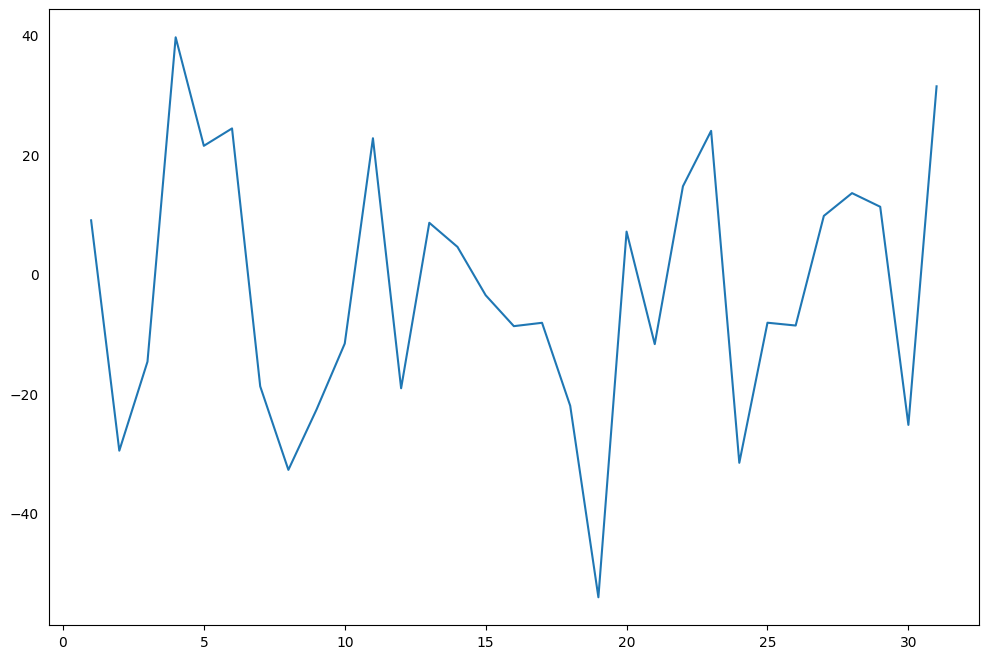

In [27]:
results.resid.plot(figsize=(12,8))

In [28]:
print(results.resid.describe())

count    31.000000
mean     -2.860919
std      21.828533
min     -54.065669
25%     -18.936161
50%      -8.131477
75%      12.409598
max      39.623924
dtype: float64


<AxesSubplot:ylabel='Density'>

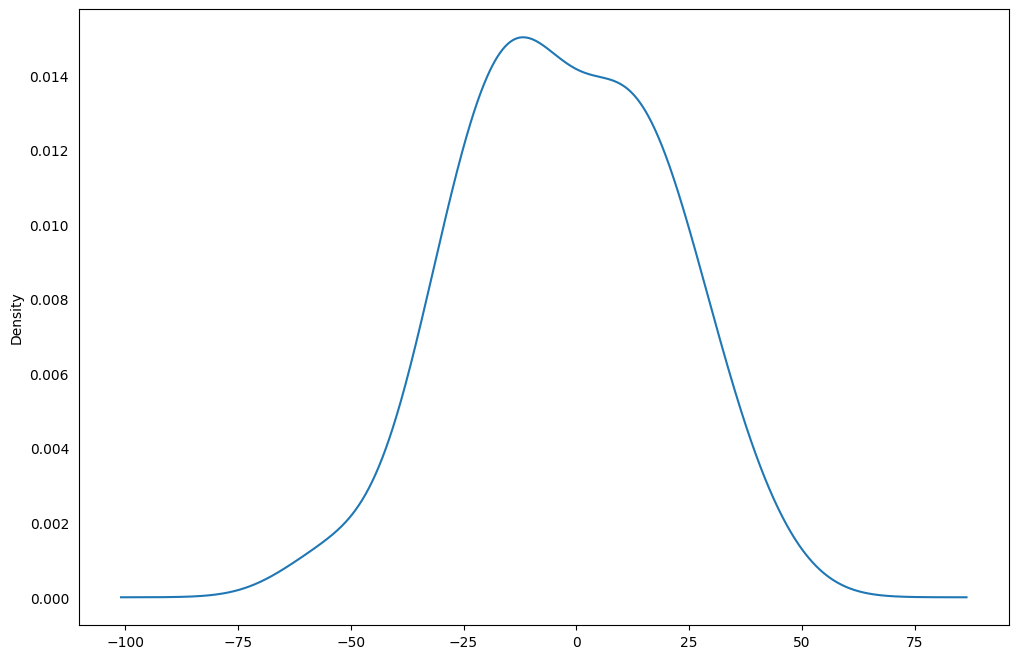

In [29]:
results.resid.plot(figsize=(12,8),kind='kde')

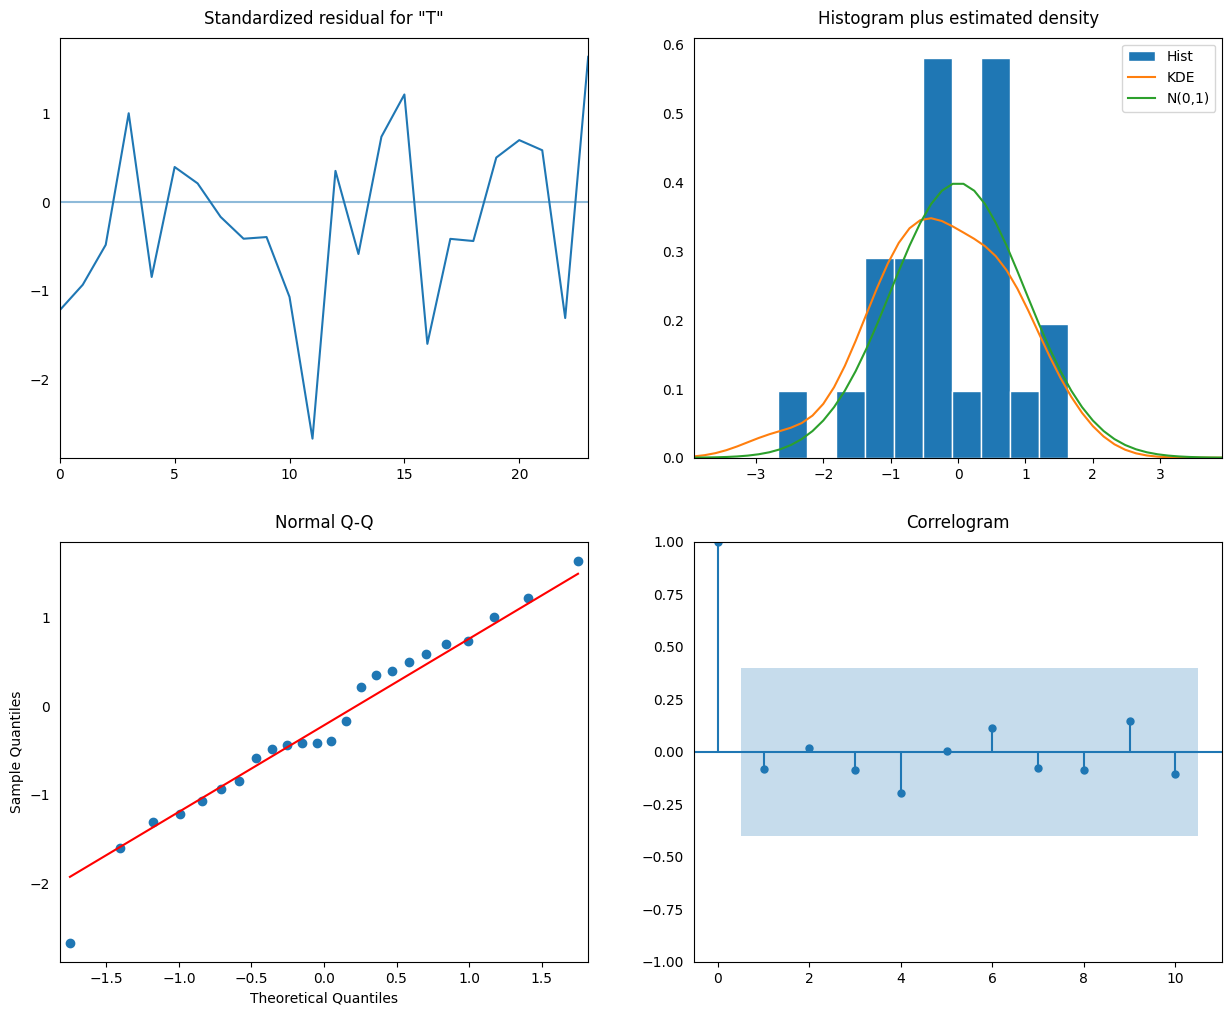

In [30]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

                                 SARIMAX Results                                  
Dep. Variable:     Total greenhouse gases   No. Observations:                   31
Model:                     ARIMA(5, 1, 0)   Log Likelihood                -128.601
Date:                    Sun, 03 Sep 2023   AIC                            269.202
Time:                            18:19:04   BIC                            277.609
Sample:                                 0   HQIC                           271.892
                                     - 31                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2717      0.184     -6.929      0.000      -1.631      -0.912
ar.L2         -0.9179      0.338     -2.713      0.007      -1.581      -0.255
ar.L3         -0.798

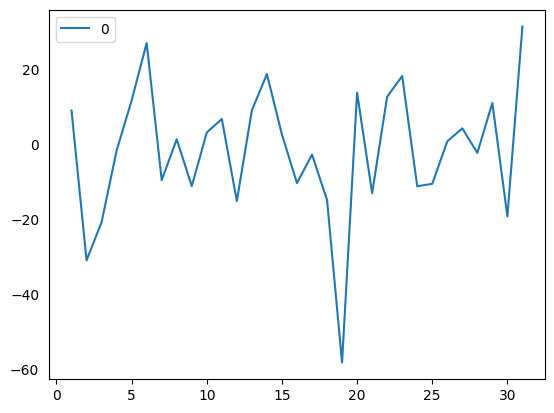

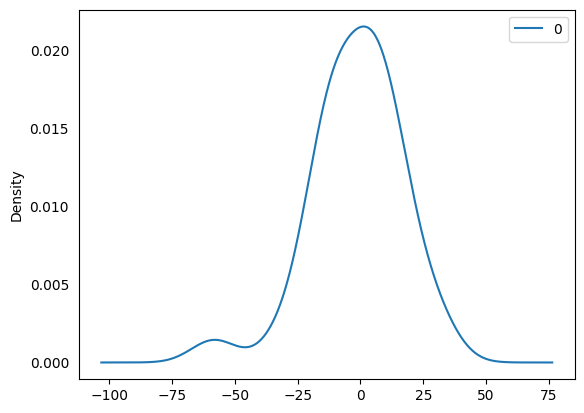

               0
count  31.000000
mean   -1.639252
std    17.820023
min   -58.258233
25%   -11.197996
50%     0.772101
75%    10.023794
max    31.429452


In [31]:
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

model = ARIMA(ts, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

predicted=-25.201617, expected=-46.000000
predicted=-2.834135, expected=16.000000
predicted=-41.570441, expected=-13.000000
predicted=-24.710194, expected=-41.000000
predicted=1.701912, expected=-17.000000
predicted=-34.457647, expected=-25.000000
predicted=-12.176559, expected=-11.000000
predicted=-5.861152, expected=-8.000000
predicted=-26.566000, expected=-16.000000
predicted=-20.624409, expected=-42.000000
predicted=-16.250227, expected=19.000000
Test RMSE: 19.365


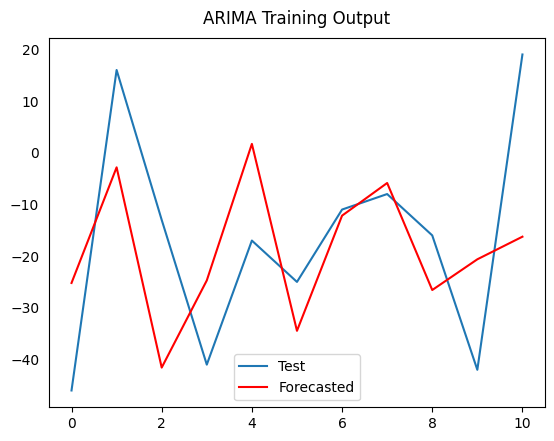

In [40]:
from math import sqrt
from sklearn.metrics import mean_squared_error
# split into train and test sets
X = ts.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(5,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.title('ARIMA Training Output')
pyplot.legend(["Test", "Forecasted"])
pyplot.show()

In [33]:
from pandas import concat
values = DataFrame(ts.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000 -0.412839
t+1 -0.412839  1.000000


Coefficients: [-16.31802702  -0.44739186   0.02914993]
predicted=1.646090, expected=-17.000000
predicted=-18.249622, expected=-25.000000
predicted=-8.105312, expected=-11.000000
predicted=-13.223752, expected=-8.000000
predicted=-10.638097, expected=-16.000000
predicted=-11.944100, expected=-42.000000
predicted=-11.284434, expected=19.000000
Test RMSE: 18.040


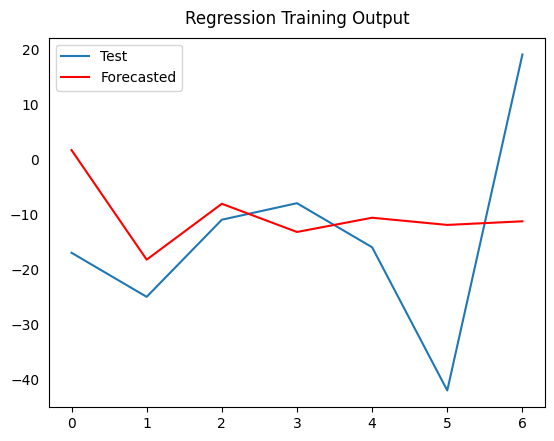

In [41]:
from statsmodels.tsa.ar_model import AutoReg
# split dataset
X = ts.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AutoReg(train, lags=2)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
 print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.title('Regression Training Output')
pyplot.legend(["Test", "Forecasted"])
pyplot.show()

In [42]:
start = pd.Timestamp('1995-01-01 00:00:00')

In [51]:
import itertools
import warnings
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [58]:
def plot_co2(train, test, y_pred, title):
    """
        This function to visualize the act and predicted value of y
    """
    rmse = sqrt(mean_squared_error(test, y_pred))
    print('Test RMSE: %.3f' % rmse)

In [59]:
# split into train and test sets
X = ts.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
train

array([  9., -22., -20., -11.,  -7.,  20., -24.,  -3., -29.,  -1.,   3.,
       -22.,   6.,  -4.,  -9.,  -7., -13., -21., -57.,  15.])

In [60]:
tes_model = ExponentialSmoothing(train,
   trend="add",
   seasonal="add",
   seasonal_periods=9
   ).fit(smoothing_level=0.5,
         smoothing_trend=0.5,
         smoothing_seasonal=0.5
   )

In [61]:
y_pred = tes_model.forecast(11)
y_pred

array([-29.20262135,  -0.87742007,  -4.82880955,   9.60939392,
         5.32793281,   5.04311461,  -8.54159594, -14.80439965,
        13.59963922,  -1.53900805,  26.78619323])

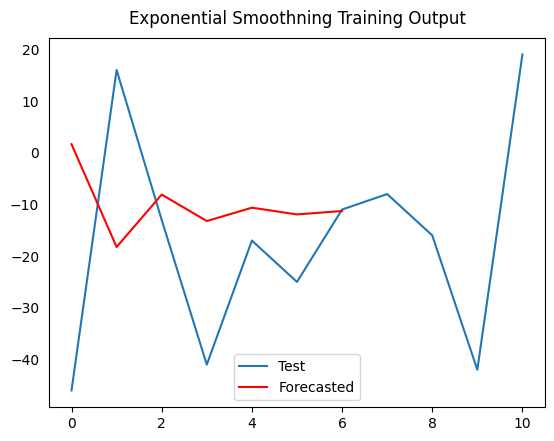

In [62]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.title('Exponential Smoothning Training Output')
pyplot.legend(["Test", "Forecasted"])
pyplot.show()

In [63]:
plot_co2(train, test, y_pred, "Triple Exponential Smoothing")

Test RMSE: 25.624


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

data_nn = pd.read_csv("/Users/achiakairabor/Downloads/chart-data.csv")
data_nn['year'] = pd.to_datetime(data_nn['year'], format='%Y')

# Set the date as the index
data_nn = data_nn.set_index('year')

# Convert the dataframe to series
ts = data_nn['Total greenhouse gases']

# Take the first difference of the data to remove the trend
ts = ts.diff()

# Drop the first NaN value coming from taking the difference 
ts = ts.dropna()

timeseries = ts.values.astype('float32')
# train-test split for time series
train_size = int(len(timeseries) * 0.67)
test_size = len(timeseries) - train_size
train, test = timeseries[:train_size], timeseries[train_size:]


In [2]:
import torch
 
def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset
    
    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

In [5]:
lookback = 1
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([19, 1]) torch.Size([19, 1])
torch.Size([10, 1]) torch.Size([10, 1])


/var/folders/5b/92jby7t52fj53dh8mdr0lryr0000gn/T/ipykernel_2332/2861746758.py:16: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:233.)
  return torch.tensor(X), torch.tensor(y)


In [19]:
import torch.nn as nn

class AirModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=64, num_layers=1, batch_first=True)
        self.linear = nn.Linear(64, 1)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x

In [23]:
import numpy as np
import torch.optim as optim
import torch.utils.data as data

model = AirModel()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

n_epochs = 20000
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

Epoch 0: train RMSE 20.0612, test RMSE 23.6365
Epoch 100: train RMSE 17.3543, test RMSE 18.0608
Epoch 200: train RMSE 17.1268, test RMSE 17.4815
Epoch 300: train RMSE 16.9999, test RMSE 17.2634
Epoch 400: train RMSE 16.8899, test RMSE 17.1456
Epoch 500: train RMSE 16.9026, test RMSE 17.0265
Epoch 600: train RMSE 16.7404, test RMSE 16.8975
Epoch 700: train RMSE 16.6421, test RMSE 16.9790
Epoch 800: train RMSE 16.4864, test RMSE 17.0594
Epoch 900: train RMSE 16.3943, test RMSE 16.9779
Epoch 1000: train RMSE 16.3299, test RMSE 17.0339
Epoch 1100: train RMSE 16.2466, test RMSE 16.9465
Epoch 1200: train RMSE 16.0854, test RMSE 17.2273
Epoch 1300: train RMSE 16.0215, test RMSE 16.9831
Epoch 1400: train RMSE 15.9063, test RMSE 16.9219
Epoch 1500: train RMSE 15.8318, test RMSE 16.9184
Epoch 1600: train RMSE 15.7402, test RMSE 16.8687
Epoch 1700: train RMSE 15.6774, test RMSE 16.8542
Epoch 1800: train RMSE 15.6750, test RMSE 16.8376
Epoch 1900: train RMSE 15.5622, test RMSE 17.0975
Epoch 2000: 

Epoch 16300: train RMSE 13.1212, test RMSE 13.6141
Epoch 16400: train RMSE 13.2320, test RMSE 13.7506
Epoch 16500: train RMSE 13.1283, test RMSE 14.3186
Epoch 16600: train RMSE 12.9629, test RMSE 13.9037
Epoch 16700: train RMSE 13.1784, test RMSE 13.4296
Epoch 16800: train RMSE 13.2380, test RMSE 13.5326
Epoch 16900: train RMSE 12.9319, test RMSE 13.3753
Epoch 17000: train RMSE 12.6565, test RMSE 13.0922
Epoch 17100: train RMSE 13.2033, test RMSE 13.4519
Epoch 17200: train RMSE 12.7834, test RMSE 13.1500
Epoch 17300: train RMSE 12.9977, test RMSE 12.9587
Epoch 17400: train RMSE 13.0526, test RMSE 13.2149
Epoch 17500: train RMSE 13.2805, test RMSE 13.0143
Epoch 17600: train RMSE 13.4617, test RMSE 13.3620
Epoch 17700: train RMSE 13.3450, test RMSE 13.5511
Epoch 17800: train RMSE 13.4509, test RMSE 13.3400
Epoch 17900: train RMSE 13.1169, test RMSE 14.0977
Epoch 18000: train RMSE 13.3107, test RMSE 13.7994
Epoch 18100: train RMSE 13.1494, test RMSE 13.8060
Epoch 18200: train RMSE 13.2759

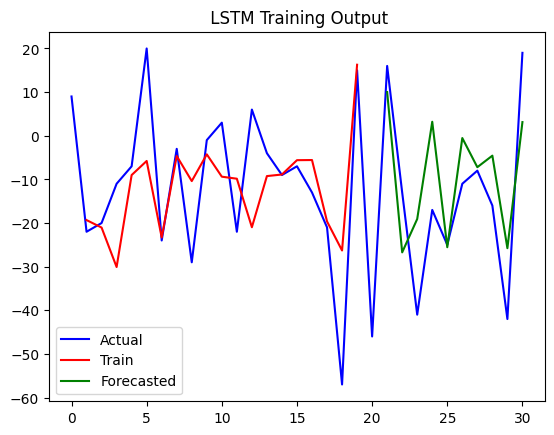

In [27]:
from matplotlib import pyplot
with torch.no_grad():
    # shift train predictions for plotting
    train_plot = np.ones_like(timeseries) * np.nan
    y_pred = model(X_train)
    y_pred = y_pred[:, -1]
    train_plot[lookback:train_size] = model(X_train)[:, -1]
    # shift test predictions for plotting
    test_plot = np.ones_like(timeseries) * np.nan
    test_plot[train_size+lookback:len(timeseries)] = model(X_test)[:, -1]
# plot
plt.plot(timeseries, c='b')
plt.plot(train_plot, c='r')
plt.plot(test_plot, c='g')
pyplot.title(' LSTM Training Output')
pyplot.legend(["Actual", "Train", "Forecasted"])
plt.show()